In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("BOOKS_DATASET.csv")
print(df.head()) 
print(df.info())
colnames = list(df.columns)
print(colnames)
df

        isbn                      authors  original_publication_year  \
0  439023483              Suzanne Collins                       2008   
1  439554934  J.K. Rowling, Mary GrandPré                       1997   
2  316015849              Stephenie Meyer                       2005   
3   61120081                   Harper Lee                       1960   
4  743273567          F. Scott Fitzgerald                       1925   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)           eng   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0            4.34        4780653             4942365             

isbn                          authors  original_publication_year  \
0      439023483                  Suzanne Collins                       2008   
1      439554934      J.K. Rowling, Mary GrandPré                       1997   
2      316015849                  Stephenie Meyer                       2005   
3       61120081                       Harper Lee                       1960   
4      743273567              F. Scott Fitzgerald                       1925   
...          ...                              ...                        ...   
7788   224079948                     Ian Mortimer                       2008   
7789   810983559  Michael Buckley, Peter Ferguson                       2009   
7790   441019455                    Ilona Andrews                       2010   
7791  067973371X                   Robert A. Caro                       1990   
7792  039330762X                  Patrick O'Brian                       1977   

                                                  title language_code  \
0               The Hunger Games (The Hunger Games, #1)           eng   
1     Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                               Twilight (Twilight, #1)           eng   
3                                 To Kill a Mockingbird           eng   
4                                      The Great Gatsby           eng   
...                                                 ...           ...   
7788  The Time Traveller's Guide to Medieval England...           eng   
7789          The Everafter War (The Sisters Grimm, #7)           eng   
7790                          Bayou Moon (The Edge, #2)           eng   
7791  Means of Ascent (The Years of Lyndon Johnson, #2)           eng   
7792                              The Mauritius Command           eng   

      average_rating  ratings_count  work_ratings_count  \
0               4.34        4780653             4942365   
1               4.44        4602479             4800065   
2               3.57        3866839             3916824   
3               4.25        3198671             3340896   
4               3.89        2683664             2773745   
...              ...            ...                 ...   
7788            3.99           9824               12115   
7789            4.32          12493               12965   
7790            4.09          17204               18856   
7791            4.25          12582               12952   
7792            4.35           9421               10733   

      work_text_reviews_count  to_read_count author_nationality    age_group  \
0                      155254            NaN           American  Young Adult   
1                       75867          287.0            British     Children   
2                       95009            NaN           American  Young Adult   
3                       72586           50.0           American     Children   
4                       51992           48.0           American  Young Adult   
...                       ...            ...                ...          ...   
7788                      970            NaN            British        Adult   
7789                      455            NaN           American     Children   
7790                     1180            NaN           American        Adult   
7791                      395            NaN           American  Young Adult   
7792                      374            NaN              Irish  Young Adult   

      main_genre  sale price  avg_sale_price  
0        fantasy         NaN        4.094286  
1        fantasy         NaN        4.927174  
2        fantasy         NaN        4.094286  
3       thriller         NaN        4.802500  
4        romance         NaN        4.641509  
...          ...         ...             ...  
7788     fantasy         NaN        4.827571  
7789     fantasy         NaN        4.927174  
7790     fantasy         NaN        4.827571  
7791  historical         NaN      

In [14]:
# on supprimeles livres dont le genre est 'unknown'
df = df[df["main_genre"] != "unknown"]
# on remplacer les valeurs manquantes dans sale price par la moyenne par genre
df["sale price"] = df.groupby("main_genre")["sale price"].transform(lambda x: x.fillna(x.mean()))
# on remplacer les valeurs manquantes dans to_read_count par 0
df["to_read_count"].fillna(0, inplace=True)


df = df.dropna(subset=["isbn","title","language_code","authors"])
df.drop_duplicates(subset=["title","authors"])
print(df["language_code"].unique()) 
df = df[df["language_code"].isin(['eng','en-CA'])]
df

['eng' 'en-CA' 'spa' 'fre' 'nl' 'ger' 'nor' 'jpn' 'vie' 'pol' 'ara' 'dan'
 'per' 'ind' 'por' 'swe' 'mul' 'rus' 'ita']


C:\Users\amine\AppData\Local\Temp\ipykernel_8908\2783951970.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["to_read_count"].fillna(0, inplace=True)


isbn                          authors  original_publication_year  \
0      439023483                  Suzanne Collins                       2008   
1      439554934      J.K. Rowling, Mary GrandPré                       1997   
2      316015849                  Stephenie Meyer                       2005   
3       61120081                       Harper Lee                       1960   
4      743273567              F. Scott Fitzgerald                       1925   
...          ...                              ...                        ...   
7788   224079948                     Ian Mortimer                       2008   
7789   810983559  Michael Buckley, Peter Ferguson                       2009   
7790   441019455                    Ilona Andrews                       2010   
7791  067973371X                   Robert A. Caro                       1990   
7792  039330762X                  Patrick O'Brian                       1977   

                                                  title language_code  \
0               The Hunger Games (The Hunger Games, #1)           eng   
1     Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                               Twilight (Twilight, #1)           eng   
3                                 To Kill a Mockingbird           eng   
4                                      The Great Gatsby           eng   
...                                                 ...           ...   
7788  The Time Traveller's Guide to Medieval England...           eng   
7789          The Everafter War (The Sisters Grimm, #7)           eng   
7790                          Bayou Moon (The Edge, #2)           eng   
7791  Means of Ascent (The Years of Lyndon Johnson, #2)           eng   
7792                              The Mauritius Command           eng   

      average_rating  ratings_count  work_ratings_count  \
0               4.34        4780653             4942365   
1               4.44        4602479             4800065   
2               3.57        3866839             3916824   
3               4.25        3198671             3340896   
4               3.89        2683664             2773745   
...              ...            ...                 ...   
7788            3.99           9824               12115   
7789            4.32          12493               12965   
7790            4.09          17204               18856   
7791            4.25          12582               12952   
7792            4.35           9421               10733   

      work_text_reviews_count  to_read_count author_nationality    age_group  \
0                      155254            0.0           American  Young Adult   
1                       75867          287.0            British     Children   
2                       95009            0.0           American  Young Adult   
3                       72586           50.0           American     Children   
4                       51992           48.0           American  Young Adult   
...                       ...            ...                ...          ...   
7788                      970            0.0            British        Adult   
7789                      455            0.0           American     Children   
7790                     1180            0.0           American        Adult   
7791                      395            0.0           American  Young Adult   
7792                      374            0.0              Irish  Young Adult   

      main_genre  sale price  avg_sale_price  
0        fantasy    4.674677        4.094286  
1        fantasy    4.674677        4.927174  
2        fantasy    4.674677        4.094286  
3       thriller    5.154091        4.802500  
4        romance    4.399820        4.641509  
...          ...         ...             ...  
7788     fantasy    4.674677        4.827571  
7789     fantasy    4.674677        4.927174  
7790     fantasy    4.674677        4.827571  
7791  historical    4.194918      

In [ ]:
#SCORING : 
df["score_rating"] = df["average_rating"] / df["average_rating"].max()
df["score_recency"] = (df["original_publication_year"] - df["original_publication_year"].min()) / \
                     (df["original_publication_year"].max() - df["original_publication_year"].min())
df["score_pricing"] = df["avg_sale_price"] / df["avg_sale_price"].max()
df["score_final"] = (0.4*df["score_rating"] +0.3*df["score_recency"]+ 0.3*df["score_pricing"])

df_score = df[['score_rating','score_recency','score_pricing','score_final']]

df_score.describe()

score_rating  score_recency  score_pricing  score_final
count   6572.000000    6572.000000    6550.000000  6550.000000
mean       0.835158       0.888579       0.546118     0.764483
std        0.046133       0.139573       0.069207     0.049898
min        0.726141       0.000000       0.229353     0.465232
25%        0.802905       0.871429       0.529451     0.749267
50%        0.836100       0.938095       0.561258     0.772334
75%        0.867220       0.966667       0.575829     0.792351
max        1.000000       1.000000       1.000000     0.970587

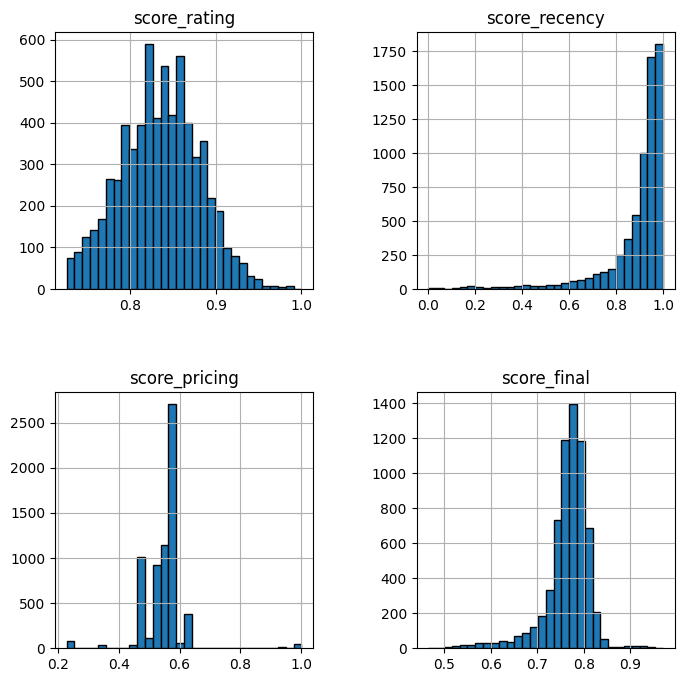

In [16]:
df_score.hist(figsize=(8, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [47]:
df = df.sort_values(by="score_final", ascending=False)

# Équilibrer les genres
top_per_genre = df.groupby("main_genre").head(500)

# Équilibrer les groupes d'âge 
top_per_age = df.groupby("age_group").head(2000)

# Équilibrer la nationalité des auteurs 
top_per_country = df.groupby("author_nationality").head(500)

# Fusionner
df_selection = pd.concat([top_per_genre, top_per_age, top_per_country])

# Limiter à 5 000 livres
df_selection = df_selection.head(5000)
df_selection
df_selection.to_csv("selection_books.csv", index=False)
df.to_csv("BOOKS_DATASET_final.csv", index =False)


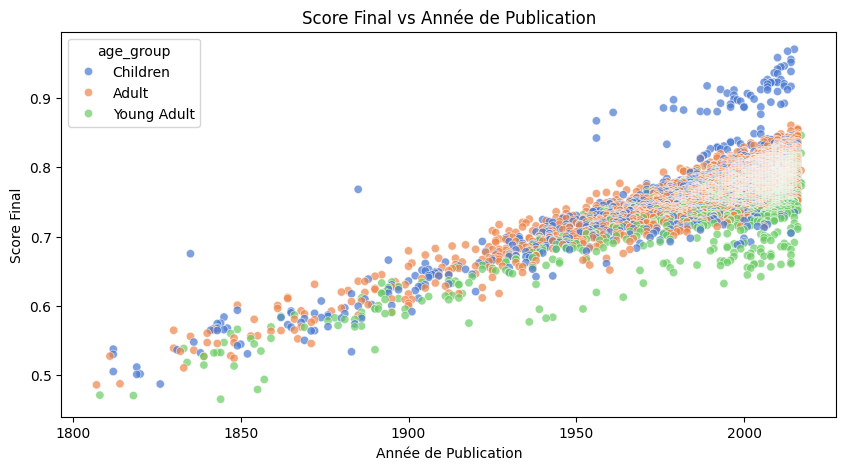

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="original_publication_year", y="score_final", hue="age_group", palette="muted", alpha=0.7)
plt.title("Score Final vs Année de Publication")
plt.xlabel("Année de Publication")
plt.ylabel("Score Final")
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_8908\1002167048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selection, x="main_genre", order=df["main_genre"].value_counts().index, palette="viridis")


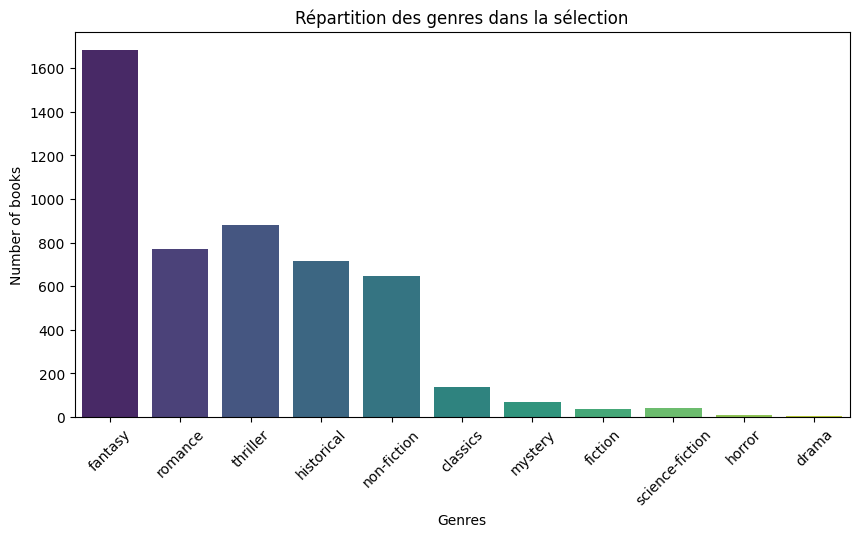

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_selection, x="main_genre", order=df["main_genre"].value_counts().index, palette="viridis")
plt.title("Répartition des genres dans la sélection")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of books")
plt.show()

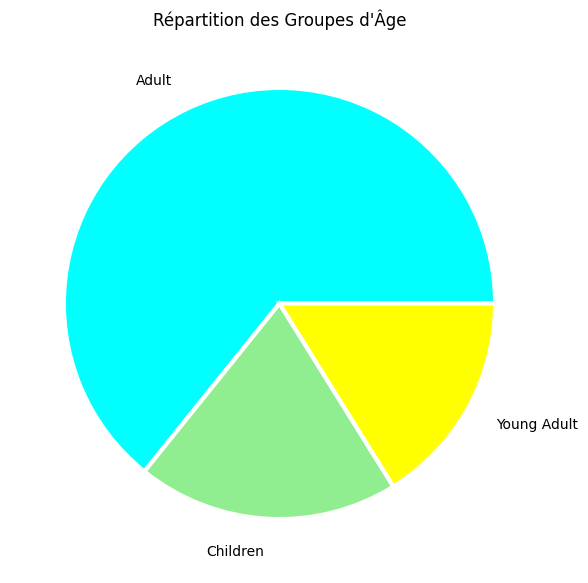

In [24]:
plt.figure(figsize=(7,7))
df_selection["age_group"].value_counts().plot.pie(colors=["cyan","lightgreen","yellow"],labeldistance=1.15, wedgeprops={'linewidth' : 3,'edgecolor':'white'})
plt.title("Répartition des Groupes d'Âge")
plt.ylabel("")
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_8908\2460512389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


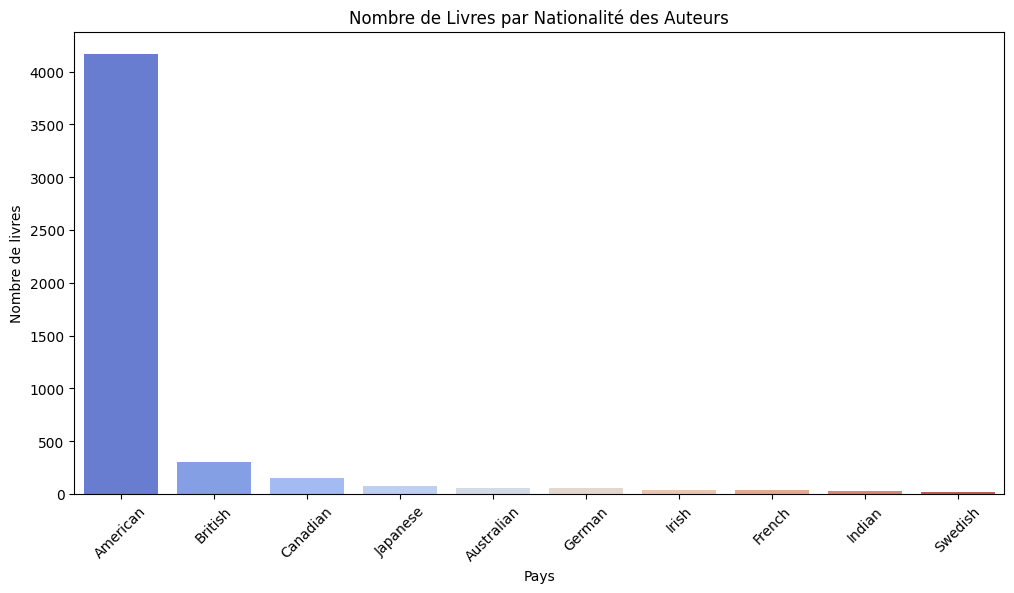

In [22]:
top_countries = df_selection["author_nationality"].value_counts().head(10)  

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Nombre de Livres par Nationalité des Auteurs")
plt.xlabel("Pays")
plt.ylabel("Nombre de livres")
plt.xticks(rotation=45)
plt.show()